<a href="https://colab.research.google.com/github/JonathanRibeiro92/ReconhecimentoPadroes/blob/main/tarefa_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataSet para regressão linear - Bodyfat**
https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=lte_1&id=560

Lista estimativas da porcentagem de gordura corporal determinada por pesagem subaquática e várias medidas de circunferência corporal para 252 homens.

In [ ]:
from sklearn.datasets import fetch_openml 
dataset = fetch_openml(data_id=560)
X, y = dataset.data, dataset.target

X.shape, y.shape

((252, 14), (252,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)
ypred = model.predict(X)
print('MSE: ', mean_squared_error(y, ypred))
print('Intercept: ', model.intercept_)
print('Coef: ', model.coef_)

MSE:  1.527203518390806
Intercept:  450.01256934457547
Coef:  [-4.11237849e+02  1.25870031e-02  1.00541597e-02 -7.98073928e-03
 -2.84558253e-02  2.67803354e-02  1.85648834e-02  1.91660401e-02
 -1.67583631e-02 -4.63900522e-03 -8.56761181e-02 -5.50508219e-02
  3.38634347e-02  7.34493756e-03]


NameError: ignored

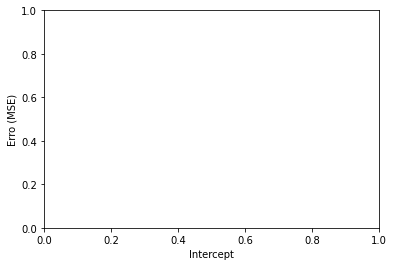

In [ ]:
def errorDelta(delta=100):
  _model = LinearRegression()
  _model.fit(X,y)

  intercept = _model.intercept_
  intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 100))
  mse_array = []

  for value in intercept_values:
      model.intercept_ = value
      ypred = model.predict(X)
      _mse = mean_squared_error(y, ypred)
      mse_array.append(_mse)

  return mse_array, intercept_values

from matplotlib import pyplot

pyplot.ylabel("Erro (MSE)")
pyplot.xlabel("Intercept")

errors, weights = errorDelta(25)
pyplot.plot(weights, errors)